**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6POXPvywWu9GhIgR3Qit")
project = rf.workspace("ai-cftyz").project("e-waste-classification-a25jm")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to e-waste-classification-3 in yolov11:: 100%|██████████| 10068/10068 [00:02<00:00, 3863.30it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=segment mode=train model=yolo11s-seg.pt data={f'/content/datasets/e-waste-classification-3'}/data.yaml epochs=25 plots=True

/content
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/e-waste-classification-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [7]:
!ls {HOME}/runs/segment/train2/

args.yaml					    MaskF1_curve.png	 train_batch4096.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch4097.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1732888694.5b18225c9850.1291.0  train_batch1.jpg	 val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	 weights
labels.jpg					    train_batch4095.jpg


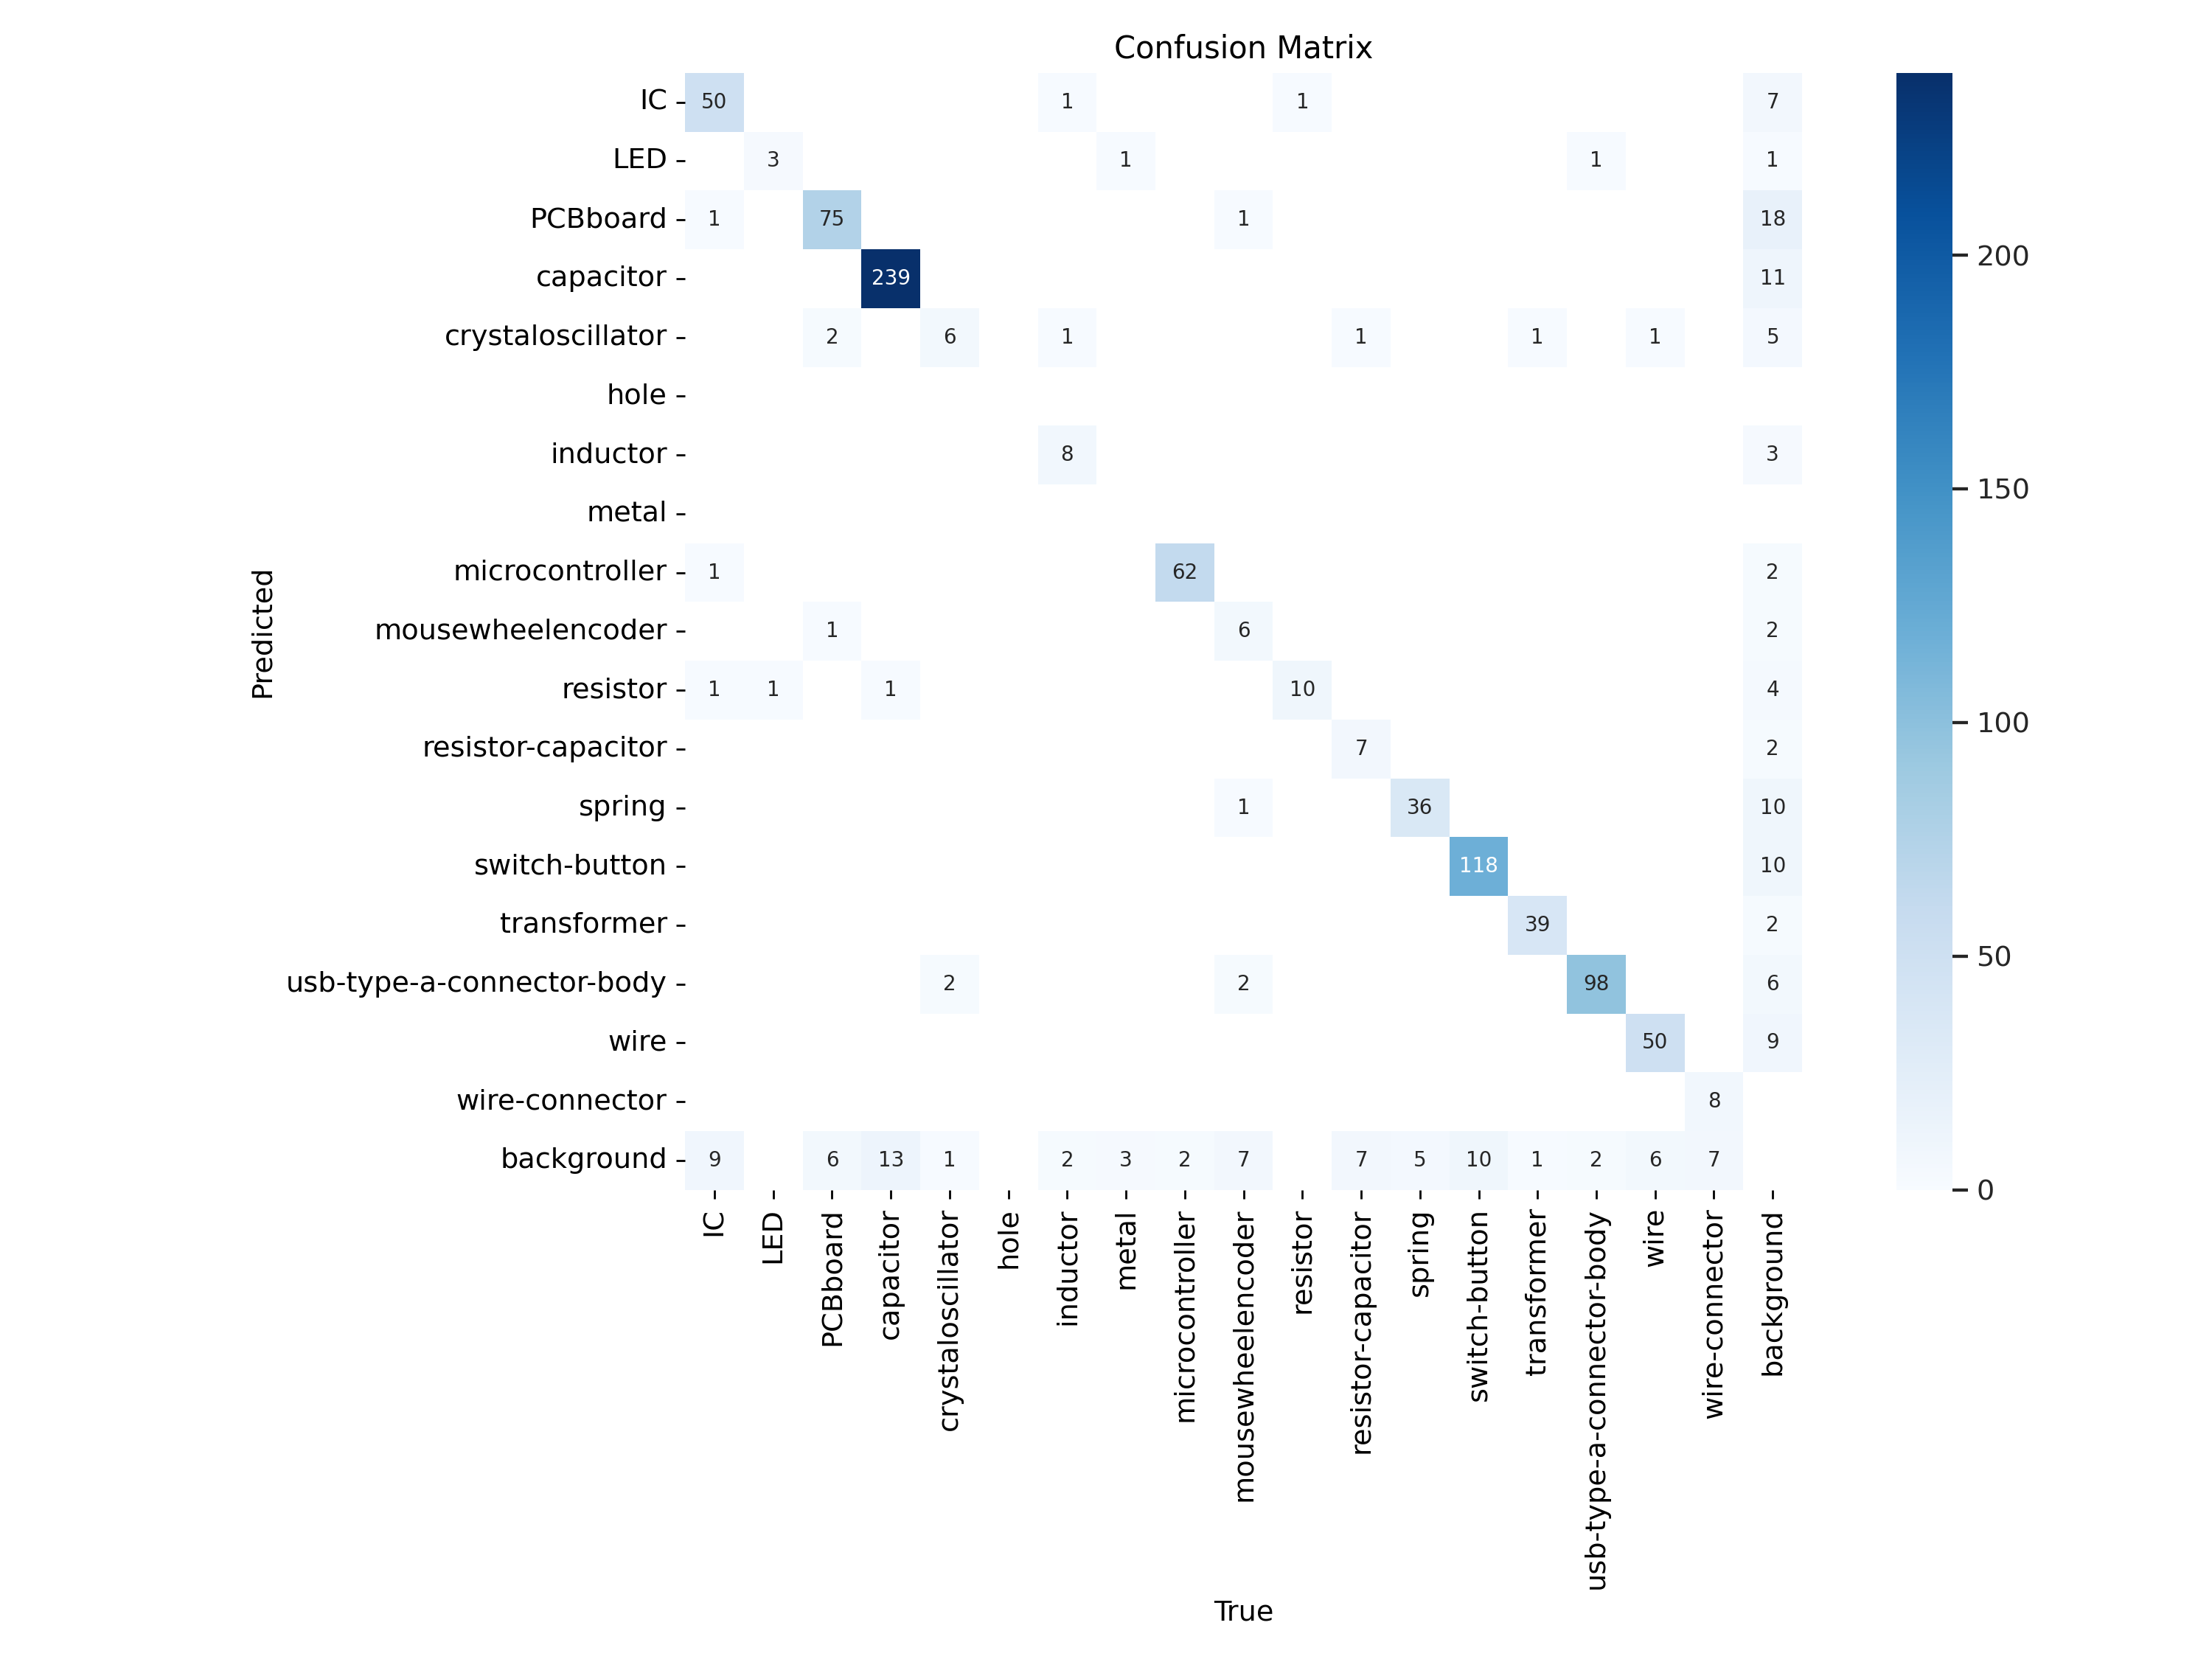

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

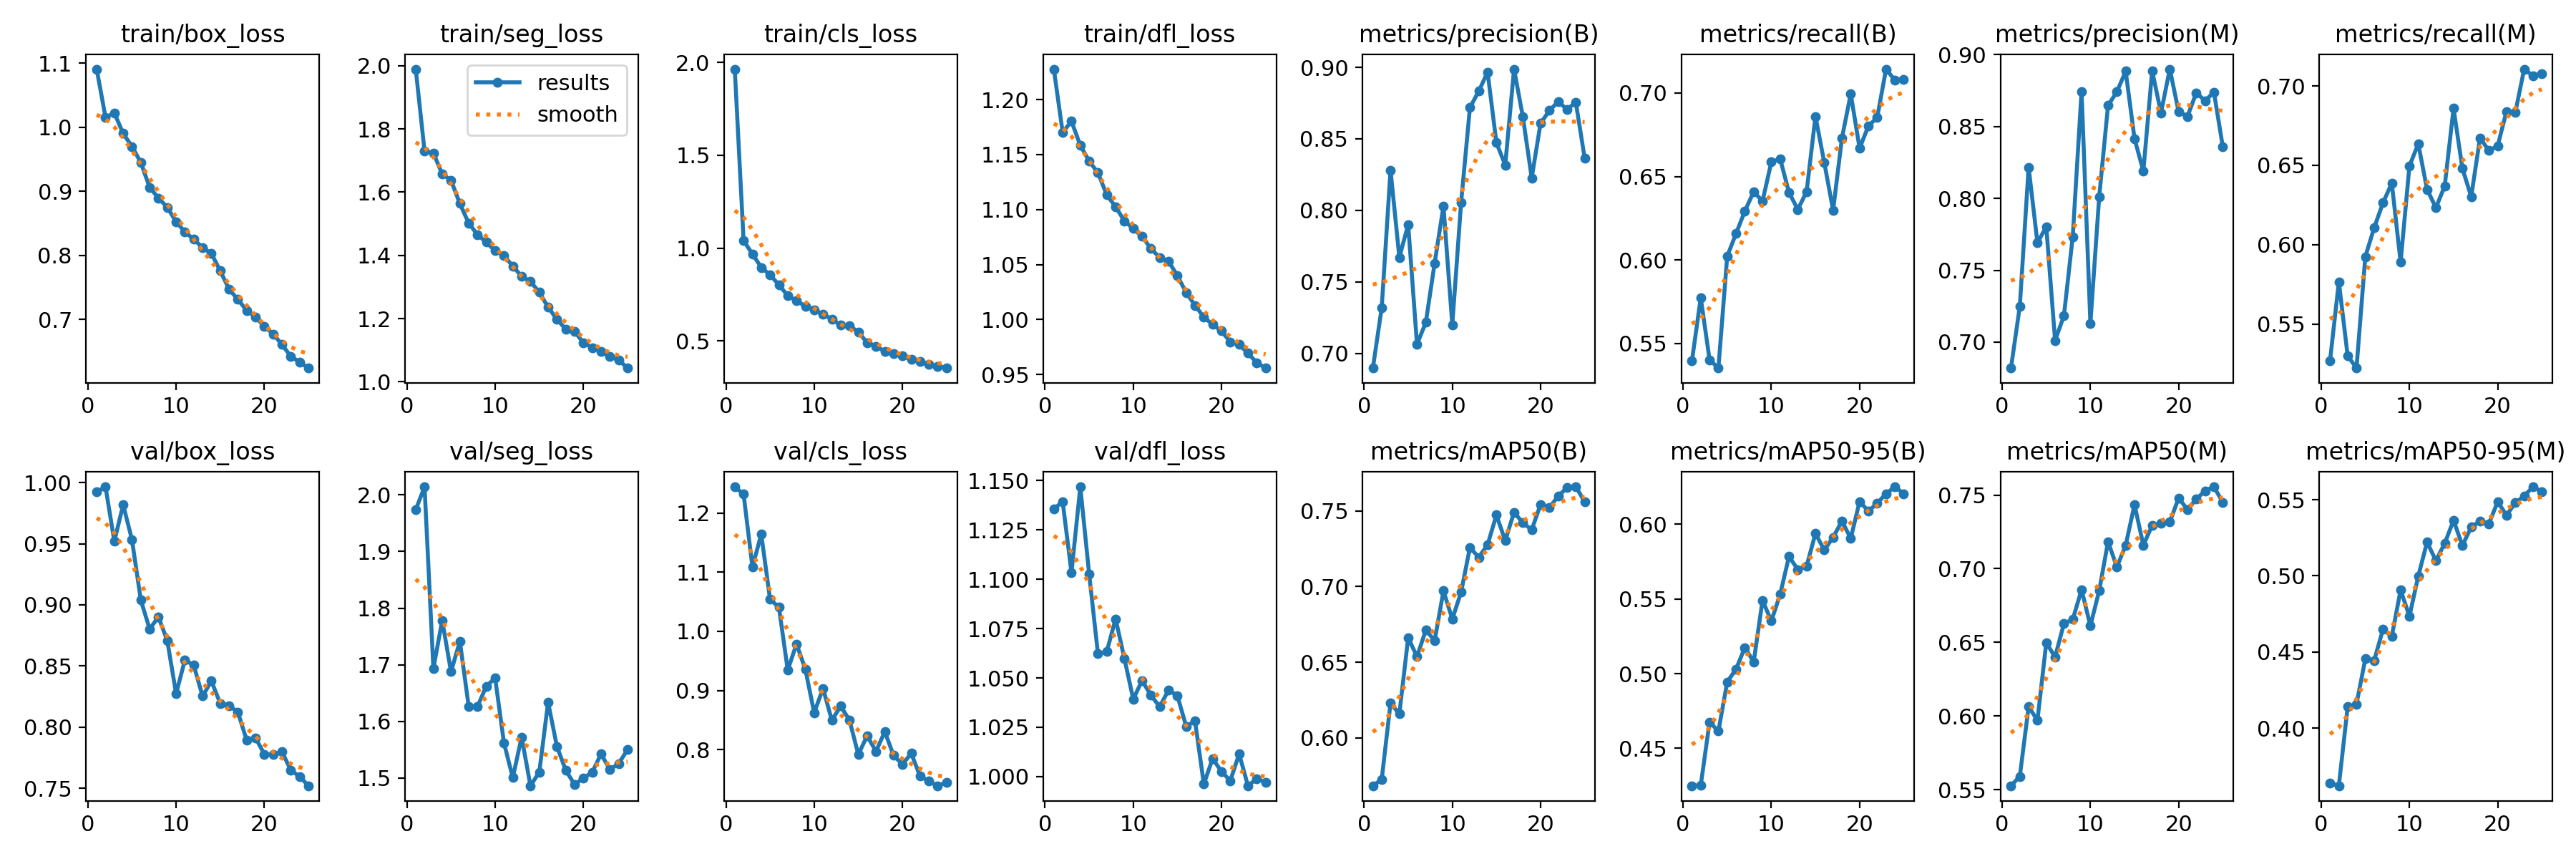

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

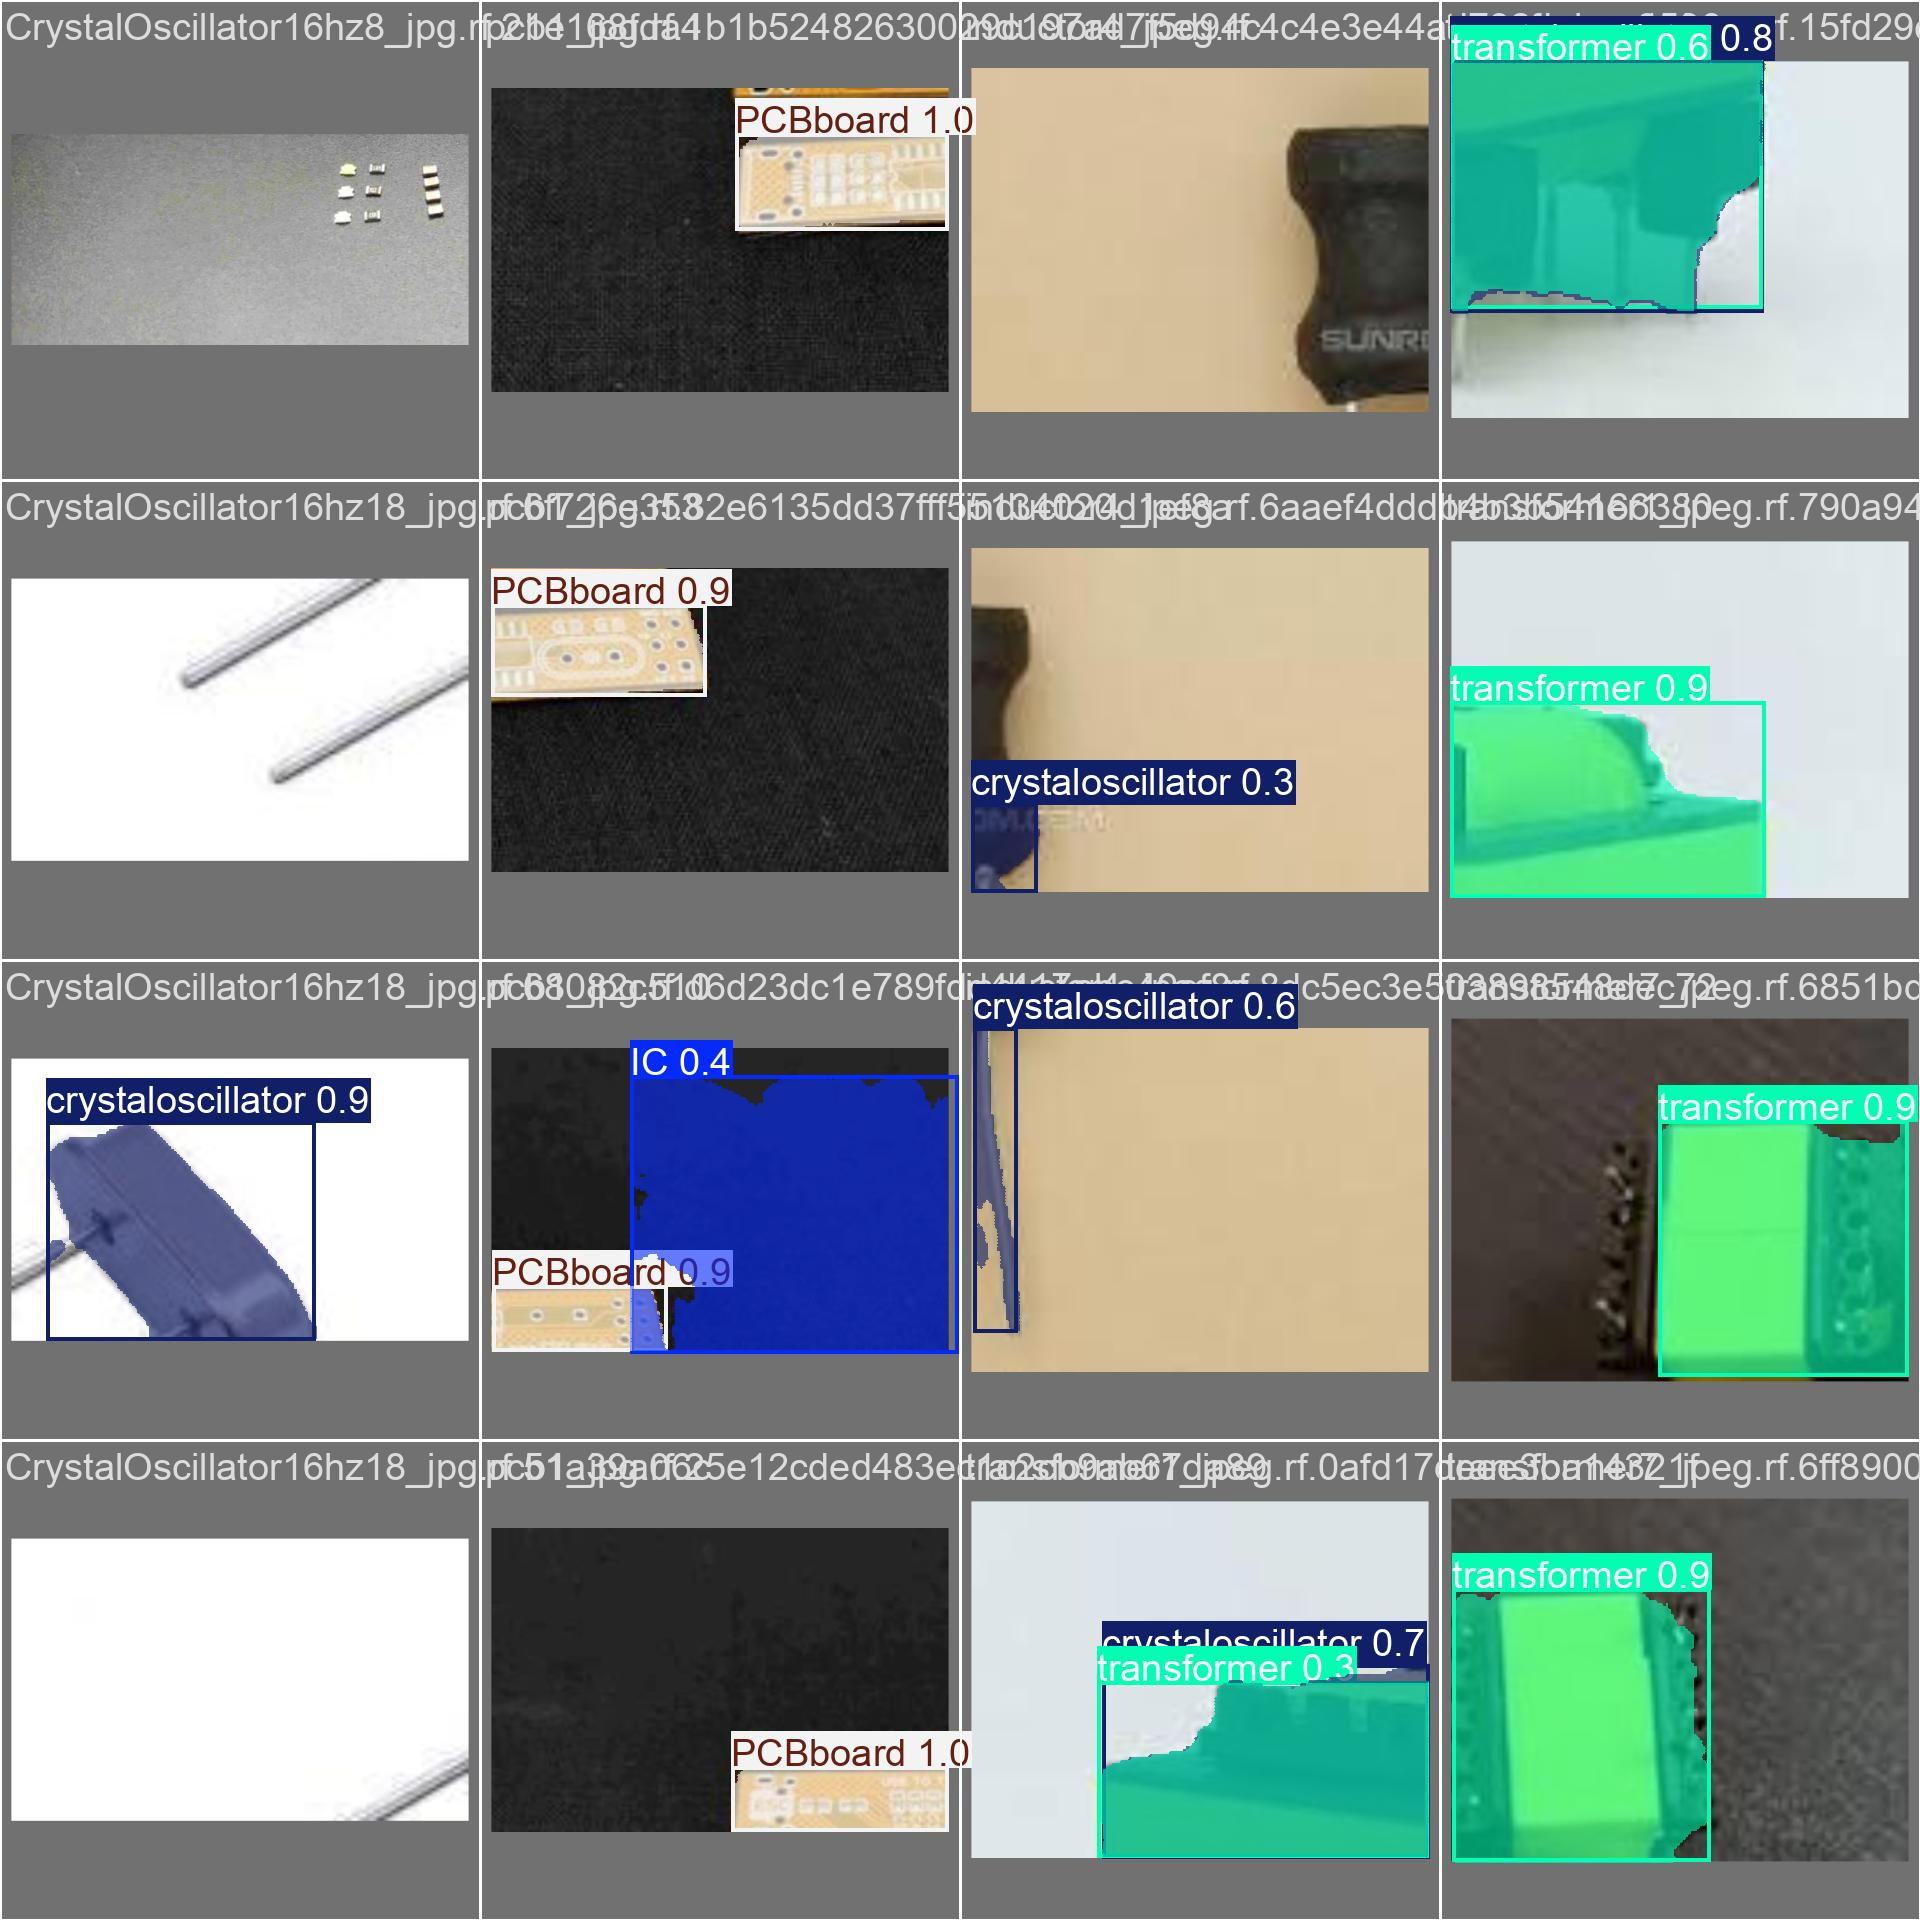

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train2/val_batch1_pred.jpg', width=600)

## Validate fine-tuned model

In [11]:
!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,073,782 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/e-waste-classification-3/valid/labels.cache... 441 images, 54 backgrounds, 0 corrupt: 100% 441/441 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 28/28 [00:08<00:00,  3.16it/s]
                   all        441        918      0.882      0.704      0.767      0.625      0.881      0.703      0.756      0.558
                    IC         61         62      0.927      0.817       0.87      0.728      0.927      0.817      0.858      0.682
                   LED          3          4      0.491       0.75      0.758      0.609      0.491       0.75      0.746      0.638
              PCBboard         62         84      0.933      0.786      0.899      0.746      0.933      0.786  

## Inference with custom model

In [12]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,073,782 parameters, 0 gradients, 35.3 GFLOPs

image 1/223 /content/datasets/e-waste-classification-3/test/images/-2CMJ-KTIqdxgdzalcHyAEAxahI5DxgrQdwbfNVpvS0-_plaintext_638637514030839400_jpg.rf.030857126c17448d6dd3f0c248381bf0.jpg: 288x640 2 resistor-capacitors, 56.9ms
image 2/223 /content/datasets/e-waste-classification-3/test/images/-2CMJ-KTIqdxgdzalcHyAEAxahI5DxgrQdwbfNVpvS0-_plaintext_638637514030839400_jpg.rf.3d8e6cfee93e1b295169ac18da37298e.jpg: 288x640 2 resistor-capacitors, 13.8ms
image 3/223 /content/datasets/e-waste-classification-3/test/images/-2CMJ-KTIqdxgdzalcHyAEAxahI5DxgrQdwbfNVpvS0-_plaintext_638637514030839400_jpg.rf.57ce191d47dbd5f64cd4c27c82950ddf.jpg: 288x640 5 resistor-capacitors, 16.8ms
image 4/223 /content/datasets/e-waste-classification-3/test/images/AwgeYHCaV0UskUsUth7aMVoMQtn_VU7n0_SVObabYYg-_plaintext_638637514038524696_jpg.rf.4c98d932

**NOTE:** Let's take a look at few results.

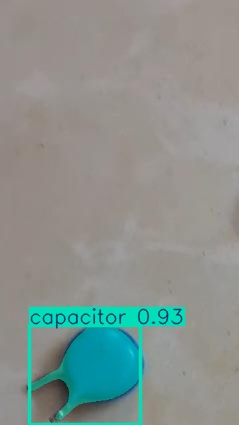

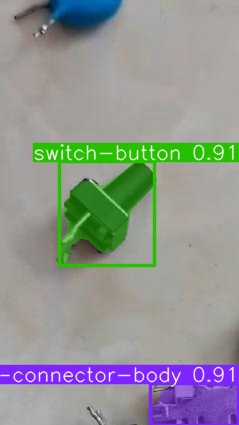

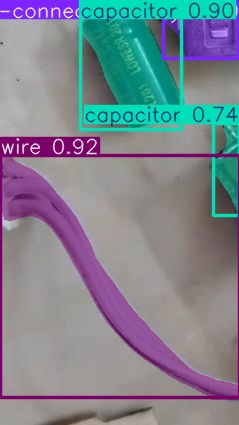

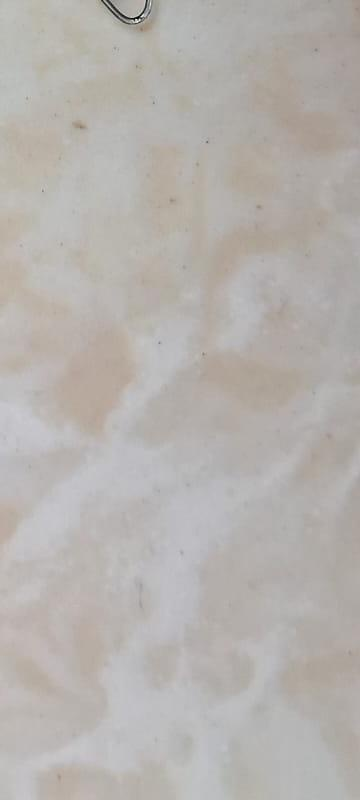

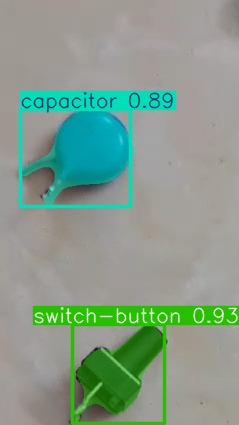

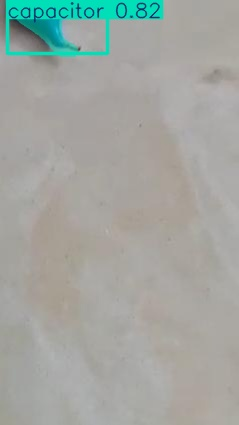

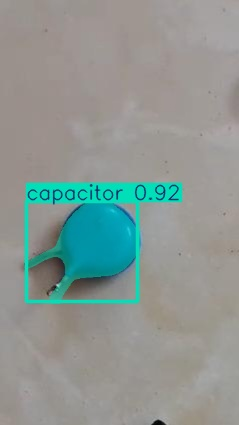

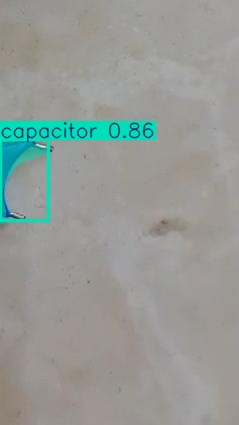

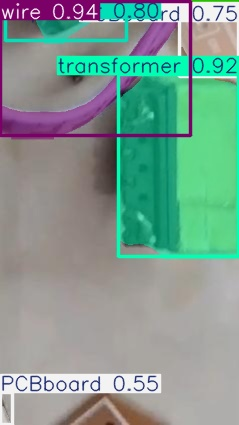

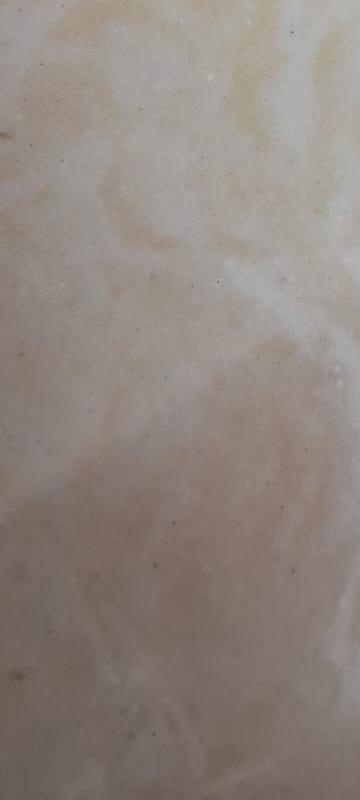

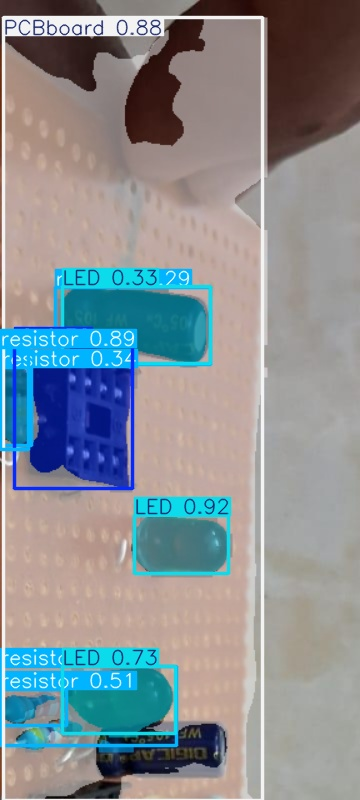

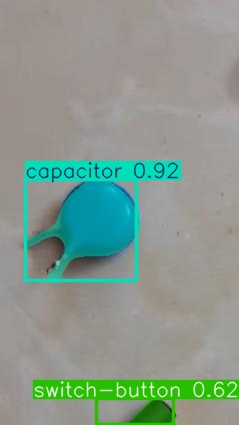

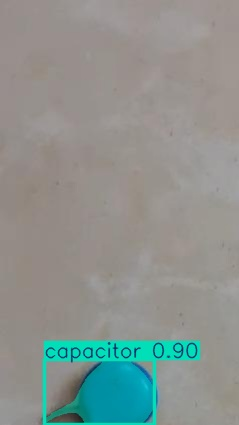

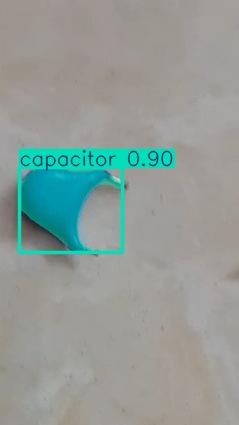

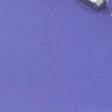

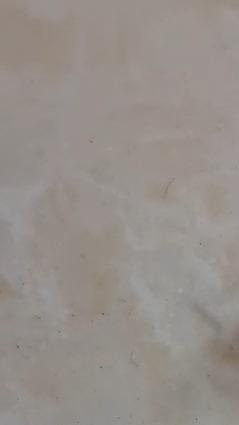

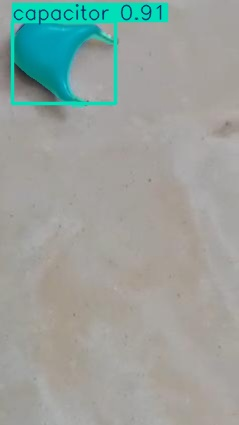

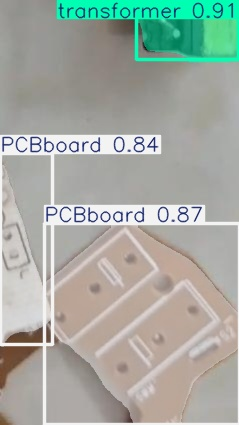

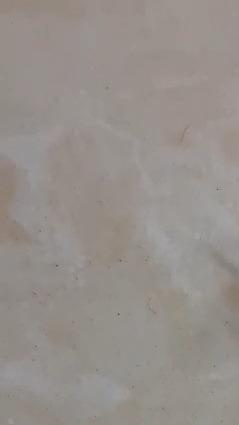

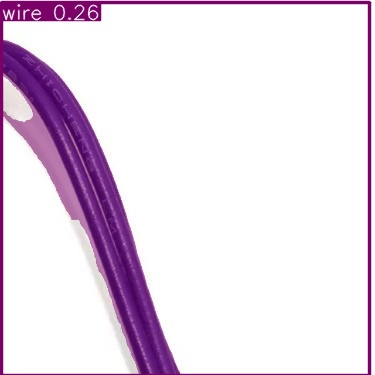

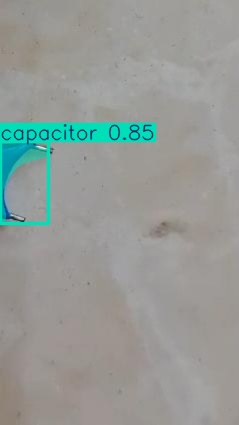

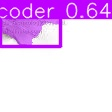

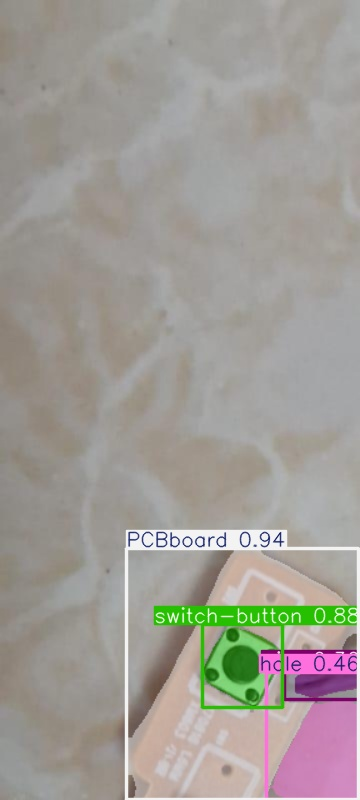

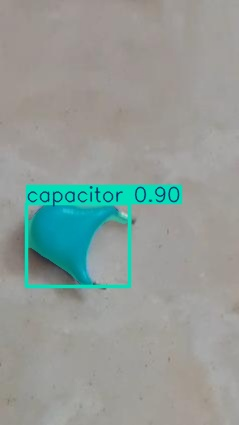

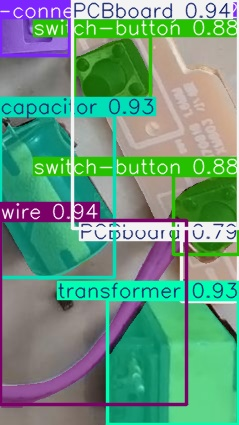

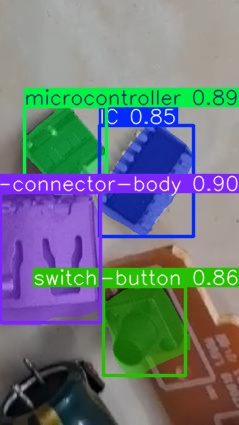

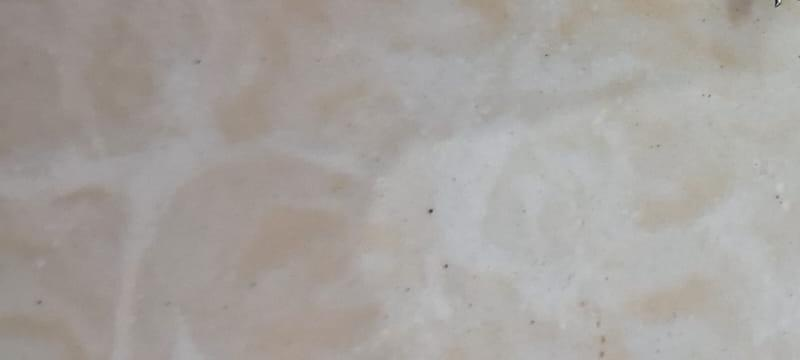

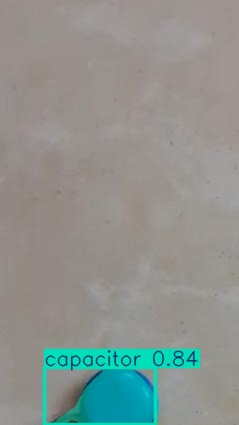

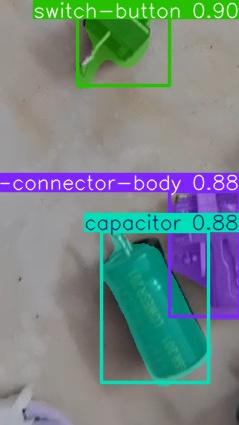

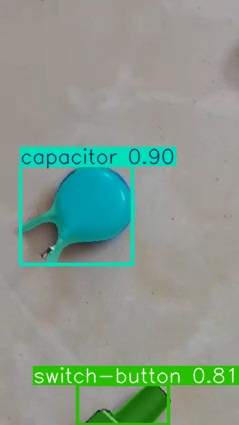

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:30]:
    display(IPyImage(filename=img, width=600))
    print("\n")